#  <h1 style="color:#b1ddf8;">🔹 Nội dung 1: Làm quen với dữ liệu và Matplotlib </h1>

### ● Nhiệm vụ:
### 💡 Gợi ý:📖 Xem các trang **136-147** trong tài liệu để học cách sử dụng Matplotlib cho các biểu đồ cơ bản.
- **a.** Tải tập dữ liệu `HR_comma_sep.csv` và sử dụng pandas để đọc dữ liệu.






In [2]:
import pandas as pd


df = pd.read_csv("file/HR_comma_sep.csv")
display(df)


satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

- **b.** Thực hiện phân tích cơ bản (sử dụng `describe()`, `info()`) để hiểu cấu trúc và các đặc điểm của dữ liệu.


In [12]:
print("Thông tin dữ liệu:")
df.info() # Thông tin về cột, kiểu dữ liệu, giá trị null

print("\nThống kê mô tả:")
print(df.describe())  # Thống kê tổng quan các cột số

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Thống kê mô tả:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102   

- **c.** Sử dụng Matplotlib để vẽ:
  - 📊 Một **biểu đồ cột (bar plot)** thể hiện số lượng nhân viên theo mức lương (`salary`).
  - 📈 Một **biểu đồ phân tán (scatter plot)** giữa `satisfaction_level` và `last_evaluation`, với màu sắc khác nhau cho nhân viên đã nghỉ việc (**left = 1**) và chưa nghỉ việc (**left = 0**).

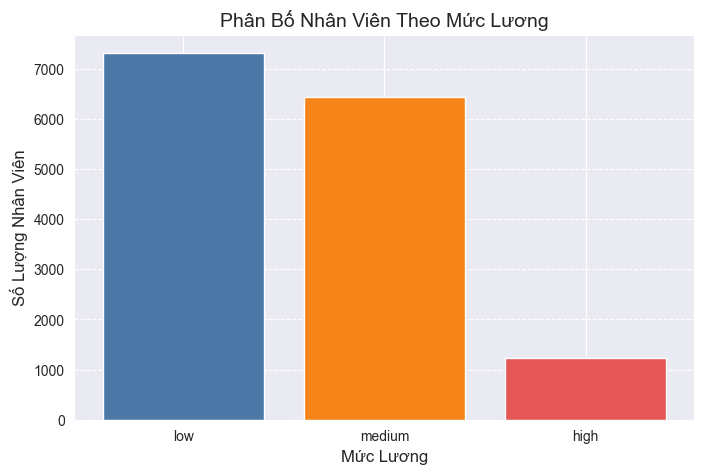

In [13]:
import matplotlib.pyplot as plt
# Biểu đồ cột
salary_order = ["low", "medium", "high"]
# Đếm số lượng nhân viên theo salary
salary_counts = df.groupby('salary').size().reindex(salary_order, fill_value=0)  # Đảm bảo thứ tự mong muốn

# Vẽ biểu đồ cột bằng matplotlib
plt.figure(figsize=(8, 5))
colors = ['#4C78A8', '#F58518', '#E45756']
plt.bar(salary_counts.index, salary_counts.values, color=colors)


plt.xlabel("Mức Lương", fontsize=12)
plt.ylabel("Số Lượng Nhân Viên", fontsize=12)
plt.title("Phân Bố Nhân Viên Theo Mức Lương", fontsize=14)
plt.xticks(rotation=0)  # Hiển thị nhãn trục X rõ ràng
plt.grid(axis='y', linestyle="--", alpha=1)
plt.show()

Nội dung 2:


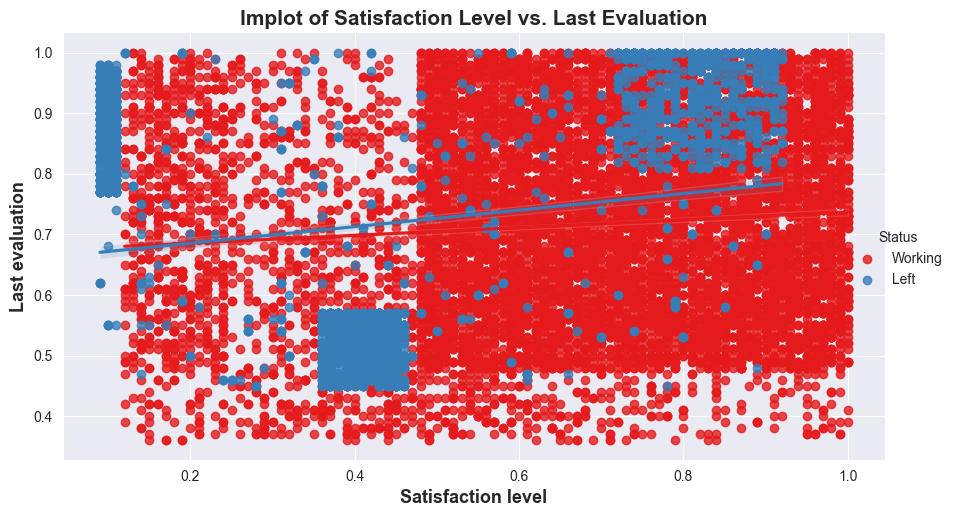

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

p=sns.lmplot(data=df, x='satisfaction_level', y='last_evaluation', hue='left', aspect=1.8, palette="Set1")# Thêm tiêu đề và nhãn
plt.title("lmplot of Satisfaction Level vs. Last Evaluation", fontweight= 'bold', fontsize=15)
plt.xlabel("Satisfaction level", fontweight= 'bold', fontsize=13)
plt.ylabel("Last evaluation", fontweight= 'bold', fontsize=13)
legend = p._legend
legend.set_title("Status")
legend.texts[0].set_text("Working")
legend.texts[1].set_text("Left")
# Hiển thị biểu đồ
plt.show()

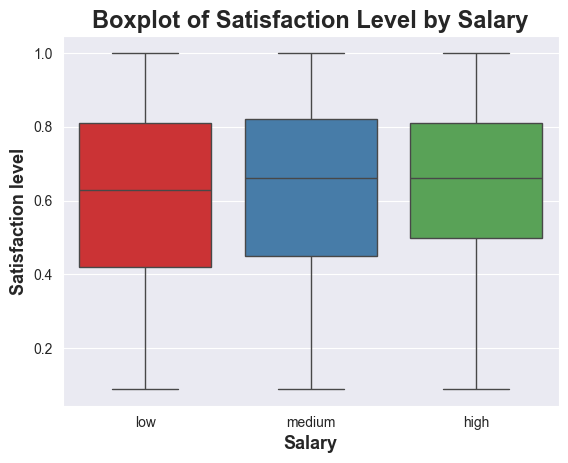

In [9]:


sns.boxplot(data = df, x='salary', y='satisfaction_level', hue='salary' , palette='Set1', legend = False)
# Thêm tiêu đề và nhãn
plt.title("Boxplot of Satisfaction Level by Salary", fontweight= 'bold', fontsize=17)
plt.ylabel("Satisfaction level", fontweight= 'bold', fontsize=13)
plt.xlabel("Salary", fontweight= 'bold', fontsize=13)
# Hiển thị biểu đồ
plt.show()


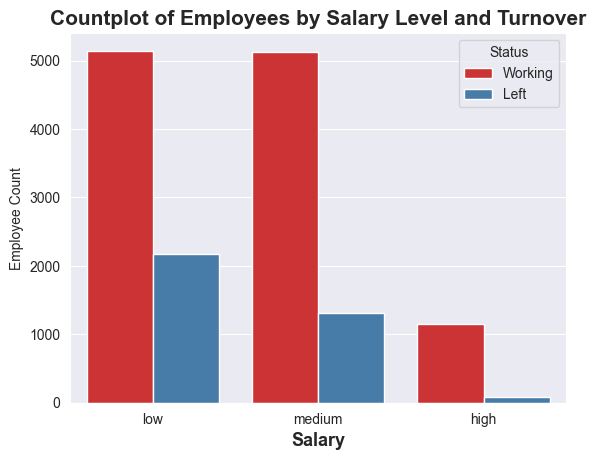

In [10]:
# Vẽ countplot
c = sns.countplot(data=df, x='salary', hue='left', palette='Set1')
# Thêm tiêu đề và nhãn
plt.title("Countplot of Employees by Salary Level and Turnover", fontweight= 'bold', fontsize=15)
plt.xlabel("Salary", fontweight= 'bold', fontsize=13)
plt.ylabel("Employee Count")
plt.legend(title = "Status", labels=["Working", "Left"])
# Hiển thị biểu đồ
plt.show()


#  <h1 style="color:#b1ddf8;">🔹 Nội dung 3: Trực quan hóa tương tác với bokeh </h1>

### ● Nhiệm vụ:
- **a.** Sử dụng Bokeh để vẽ: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Một biểu đô phân tán tương tác(interactive scatter plot) giữa satisfaction_level và last_evaluation, với tính năng hover tool hiển thị thông tin salary và left khi di chuột qua các điểm(xem trang 183-184).


In [12]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
# Đọc file CSV vào DataFrame
output_notebook()
# Tạo figure
p = figure(title="Biểu đồ từ CSV", width=1100, height=800)

source = ColumnDataSource(df)

# Tạo figure
p = figure(width=800, height=500, title="Satisfaction vs Last Evaluation",
            x_axis_label="last_evaluation",
            y_axis_label="satisfaction_level")

# Thêm HoverTool
hover = HoverTool(tooltips=[

    ("Salary", "@salary"),
    ("Left Job", "@left")
])
p.add_tools(hover)
 # Create scatter marker plot by render the circles
p.scatter("last_evaluation", "satisfaction_level", source=source,
          size=5,
          color="blue",
          alpha=0.3)

# p.scatter(x=df.index, y=df["last_evaluation"],
#           size=8, color="red", alpha=0.05, legend_label="Last Evaluation")

# Hiển thị đồ thị
show(p)

Loading BokehJS ...

- Sử dụng column layout để xếp dọc hai biểu đồ: (1) biểu đồ cột thể hiện số lượng nhân viên theo salary, (2) biểu đồ phân tán tương tác giữa satisfaction_level và last_evaluation như trên. Đảm bảo cả hai biểu đồ hiển thị cùng lúc trong một giao diện.(xem trang 169-176).


In [13]:
# Output to notebook
output_notebook()

# Chuẩn bị dữ liệu cho Bokeh
salary_counts = df['salary'].value_counts()  # Đếm số nhân viên theo mức lương

salary_rate = salary_counts.index.tolist()   # ['low', 'medium', 'high']

employee_amount = salary_counts.values.tolist()  # [500, 300, 200] (ví dụ)


source1 = ColumnDataSource(df)
p1 = figure(width=800, height=500, title="Satisfaction vs Last Evaluation",
           x_axis_label="last_evaluation",
           y_axis_label="satisfaction_level")
# Thêm HoverTool
hover = HoverTool(tooltips=[
    ("Salary", "@salary"),
    ("Left Job", "@left")
])

p1.add_tools(hover)

p1.scatter("last_evaluation", "satisfaction_level", source=source1,
          size=5,
          color="blue",
          alpha=0.3)

source2 = ColumnDataSource(data=dict(salary_rate=salary_rate, employee_amount=employee_amount))

p2 = figure(x_range=salary_rate, width=800, height=500, title="Employee Count by Salary Level",
            y_axis_label="Number of Employees", x_axis_label="Salary Level")

p2.vbar(x='salary_rate', top='employee_amount', width=0.5, source=source2, color="blue")




# Create row layout
col_layout = column(p1, p2)

# Show the plot
show(col_layout)

Loading BokehJS ...

- b.  Thêm tính năng tương tác như ẩn/hiện (hide click policy) cho các nhóm nhân viên (left=0 hoặc left=1) trong biểu đồ phân tán(xem trang 177-179).

In [14]:
output_notebook()

source = ColumnDataSource(df)
df['color'] = df['left'].map({0: "blue", 1: "red"})
# Tạo figure
p = figure(width=800, height=500, title="Satisfaction vs Last Evaluation",
           x_axis_label="last_evaluation",
           y_axis_label="satisfaction_level")

# Thêm HoverTool
hover = HoverTool(tooltips=[

    ("Salary", "@salary"),
    ("Left Job", "@left")
])
p.add_tools(hover)

for left,color in zip ([0,1],['blue','green']):
    data= df[df.left==left]
    subset_source = ColumnDataSource(data)
    p.scatter("last_evaluation", "satisfaction_level", source=subset_source, legend_label="Left " + str(left),
          size=5,
          color="color",
          alpha=0.3)

# Hiển thị đồ thị
p.legend.location = 'top_left'
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...